In [124]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from numpy import interp
from sklearn.metrics import roc_auc_score
from numpy.random import RandomState
from sklearn_pandas import DataFrameMapper
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, precision_recall_fscore_support, roc_auc_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
import warnings
from scipy import stats
import scipy.linalg as la
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.ndimage.filters import gaussian_filter
from sklearn.mixture import GaussianMixture as GMM
from sklearn.datasets.samples_generator import make_blobs
from glob import iglob
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
import PIL
from sklearn.metrics.pairwise import pairwise_distances_argmin
from time import time
import time
from sklearn import manifold
from matplotlib.ticker import NullFormatter
import seaborn as sns
import pandas as pd
from matplotlib import offsetbox

In [2]:
plane = cv2.imread("dir")
bird = cv2.imread("dir")

In [3]:
print(plane.shape, bird.shape)
print(plane.shape[0] * plane.shape[1], plane.shape[2])

(321, 481, 3) (321, 481, 3)
154401 3


In [4]:
def c_data(data):

    idx = np.array([[_//data.shape[1],_%data.shape[1]] for _ in range(data.shape[0] * data.shape[1])]); # np.array([[0, 0], [0, 1], ... [320, 480]])
    data = np.concatenate((idx, data.reshape(-1, 3)), axis=1) # img.reshape 
    
    return data

In [5]:
plane_c = c_data(plane)
bird_c = c_data(bird)

In [6]:
plane_n = (plane_c - np.mean(plane_c, axis=0)) / np.std(plane_c, axis=0)
bird_n = (bird_c - np.mean(bird_c, axis=0)) / np.std(bird_c, axis=0)

In [7]:
s_data = [plane_n, bird_n]

In [8]:
print(s_data[0][0][0], s_data[0].shape, s_data[1].shape)

-1.7266633892068624 (154401, 5) (154401, 5)


## The PCA

(0, 1)

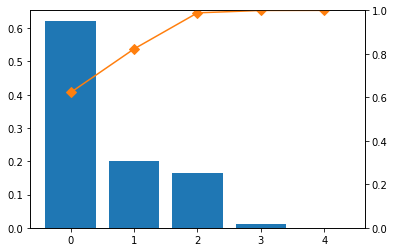

In [80]:
pca = PCA()
pca.fit(plane_n)
fig, ax = plt.subplots()
ax.bar(range(5), pca.explained_variance_ratio_)
ax2 = ax.twinx()
ax2.plot(np.cumsum(pca.explained_variance_ratio_), color="C1", marker="D", ms=7)
ax2.set_ylim([0,1])


(0, 1)

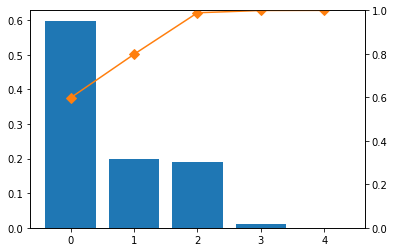

In [106]:
pca = PCA()
pca.fit(bird_n)
fig, ax = plt.subplots()
ax.bar(range(5), pca.explained_variance_ratio_)
ax2 = ax.twinx()
ax2.plot(np.cumsum(pca.explained_variance_ratio_), color="C1", marker="D", ms=7)
ax2.set_ylim([0,1])


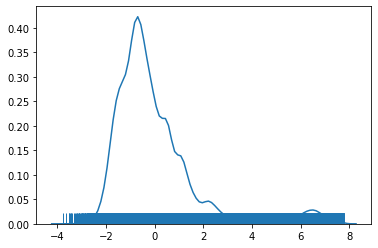

In [83]:
plane_pca = pca.transform(plane_n)
sns.distplot(plane_pca[:,0], rug=True, hist=False)

In [ ]:
bird_pca = pca.transform(bird_n)
sns.distplot(bird_pca[:,0], rug=True, hist=False)

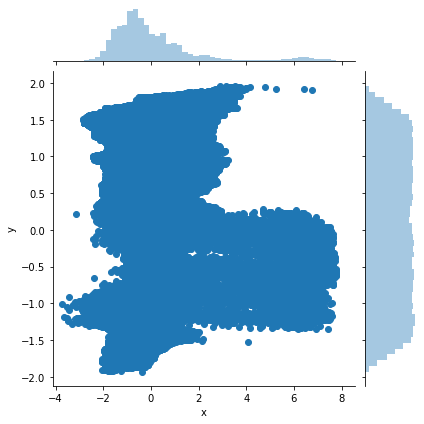

In [86]:
df = pd.DataFrame({'x': plane_pca[:,0], 'y': plane_pca[:,1]})
g = sns.jointplot(x="x", y="y", data=df, kind='scatter',
xlim=([1.1 * min(plane_pca[:,0]), 1.1 * max(plane_pca[:,0])]),
ylim=([1.1 * min(plane_pca[:,1]), 1.1 * max(plane_pca[:,1])]))

In [ ]:
df = pd.DataFrame({'x': bird_pca[:,0], 'y': bird_pca[:,1]})
g = sns.jointplot(x="x", y="y", data=df, kind='scatter',
xlim=([1.1 * min(bird_pca[:,0]), 1.1 * max(bird_pca[:,0])]),
ylim=([1.1 * min(bird_pca[:,1]), 1.1 * max(bird_pca[:,1])]))

#### The PCA conclusion:

We can easily found that in a 5 features datset, only keep the first component in a PCA algorithm, the results is already good

## The TSNE

In [114]:
plane_s = plane_n[:5000, :]
bird_s = bird_n[:5000, :]
colors = ['#4EACC5', '#FF9C34', '#000000', '#FF0000', '#0000FF']

In [115]:
# tsne_1 = manifold.TSNE(n_components=1, init='pca')
tsne_2 = manifold.TSNE(n_components=2, init='pca')
# tsne_3 = manifold.TSNE(n_components=3, init='pca')
# tsne_4 = manifold.TSNE(n_components=4, init='pca')
# tsne_5 = manifold.TSNE(n_components=5, init='pca')
# p_tsne_1 = tsne_1.fit_transform(plane_s)
p_tsne_2 = tsne_2.fit_transform(plane_s)
# p_tsne_3 = tsne_3.fit_transform(plane_s)
# p_tsne_4 = tsne_4.fit_transform(plane_s)
# p_tsne_5 = tsne_5.fit_transform(plane_s)
# b_tsne_1 = tsne_1.fit_transform(bird_s)
b_tsne_2 = tsne_2.fit_transform(bird_s)
# b_tsne_3 = tsne_1.fit_transform(bird_s)
# b_tsne_4 = tsne_1.fit_transform(bird_s)
# b_tsne_5 = tsne_1.fit_transform(bird_s)
print("Org data dimension is {}. \
Embedded data dimension is {}".format(plane_s.shape[-1], p_tsne_1.shape[-1]))


Org data dimension is 5. Embedded data dimension is 1


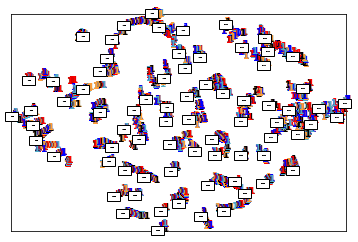

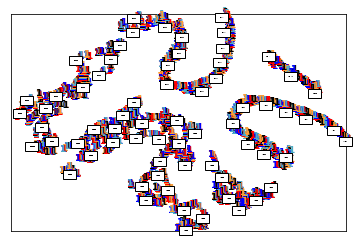

In [131]:
def plot_embedding(X, o_d, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], "1",
                 color=colors[i % 5],
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage([o_d[i]], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
        
        
plot_embedding(p_tsne_2, plane_s)
plot_embedding(b_tsne_2, bird_s)

In [133]:
def mtsne(X, perplexity=30):
    tsne = manifold.TSNE(n_components=2, perplexity=perplexity, init='pca')
    X_tsne = tsne.fit_transform(X)
    print("Org data dimension is {}. \
    Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min) # 归一化
    df = pd.DataFrame({'x': X_norm[:,0], 'y': X_norm[:,1]})
    g = sns.jointplot(x="x", y="y", data=df, kind='scatter',
                    xlim=([1.1 * min(X_norm[:,0]), 1.1 * max(X_norm[:,0])]),
                    ylim=([1.1 * min(X_norm[:,1]), 1.1 * max(X_norm[:,1])]))

In [ ]:
mtsne(plane_n, 30)
mtsne(plane_n, 10)
mtsne(plane_n, 40)
mtsne(bird_n, 30)
mtsne(bird_n, 10)
mtsne(bird_n, 40)

Org data dimension is 5.     Embedded data dimension is 2
Org data dimension is 5.     Embedded data dimension is 2


### The K-means

In the first part I set up the features as number of colors to directly see how the fetaure number influence the results

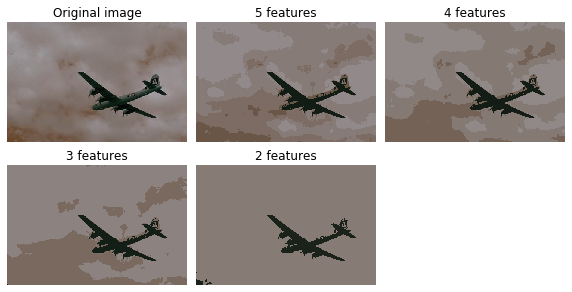

In [9]:

X = plane.reshape(-1, 3) #Reshaping to get color channel first
kmeans = KMeans(n_clusters=8, random_state=42).fit(X) #Applying and fitting K-means clustering
segmented_img = kmeans.cluster_centers_[kmeans.labels_] #centres of the 8 clusters made
segmented_img = segmented_img.reshape(plane.shape) #reshape them using the changed image shape
segmented_imgs = []
n_colors = (5, 4, 3, 2) 
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X) #Applyting kmeans for each colour, using 10,8,6.... as number of clusters
    segmented_img = kmeans.cluster_centers_[kmeans.labels_] #Repeating as mentioned above
    segmented_imgs.append(segmented_img.reshape(plane.shape))
plt.figure(figsize=(10,5)) #Plotting code
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(plane)
plt.title("Original image")
plt.axis('off')
for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx].astype('uint8'))
    plt.title("{} features".format(n_clusters))
    plt.axis('off')
# plt.imshow(out.astype('uint8'))
plt.show()

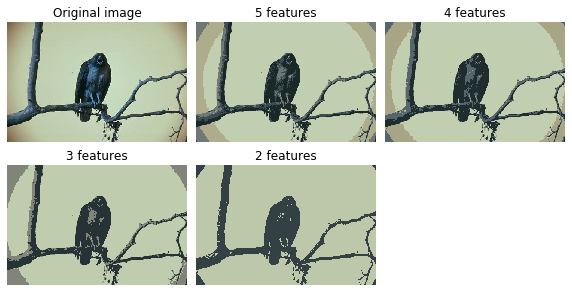

In [98]:

X = bird.reshape(-1, 3) #Reshaping to get color channel first
kmeans = KMeans(n_clusters=8, random_state=42).fit(X) #Applying and fitting K-means clustering
segmented_img = kmeans.cluster_centers_[kmeans.labels_] #centres of the 8 clusters made
segmented_img = segmented_img.reshape(bird.shape) #reshape them using the changed image shape
segmented_imgs = []
n_colors = (5, 4, 3, 2) 
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X) #Applyting kmeans for each colour, using 10,8,6.... as number of clusters
    segmented_img = kmeans.cluster_centers_[kmeans.labels_] #Repeating as mentioned above
    segmented_imgs.append(segmented_img.reshape(plane.shape))
plt.figure(figsize=(10,5)) #Plotting code
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(bird)
plt.title("Original image")
plt.axis('off')
for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx].astype('uint8'))
    plt.title("{} features".format(n_clusters))
    plt.axis('off')
# plt.imshow(out.astype('uint8'))
plt.show()

In [92]:
kmeans_2 = KMeans(n_clusters=2, random_state=0)
kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_5 = KMeans(n_clusters=5, random_state=0)
clusters = kmeans_2.fit_predict(plane_n)
clusters = kmeans_3.fit_predict(plane_n)
clusters = kmeans_4.fit_predict(plane_n)
clusters = kmeans_5.fit_predict(plane_n)
print(kmeans_2.cluster_centers_.shape,
kmeans_3.cluster_centers_.shape,
kmeans_4.cluster_centers_.shape,
kmeans_5.cluster_centers_.shape
     )

(2, 5) (3, 5) (4, 5) (5, 5)


[[ 0.5009701   0.36313649 -3.75436863 -3.39356609 -3.14109366]
 [-0.02868489 -0.02079271  0.21497018  0.19431111  0.17985487]] [[ 0.44501441  0.45797938 -3.9672616  -3.53648696 -3.23455673]
 [-0.67813864  0.03588212  0.40524991  0.4732242   0.50066889]
 [ 1.05500707 -0.12246616 -0.11820224 -0.28974501 -0.37672133]] [[ 0.44435782  0.45914719 -3.97939701 -3.54807701 -3.24482144]
 [-0.70707772 -0.88807325  0.467089    0.58412082  0.63425847]
 [ 1.09995964 -0.3986044  -0.24595279 -0.46730084 -0.58156753]
 [-0.28373589  0.97509644  0.32432488  0.33287503  0.33509175]] [[ 1.02459967 -0.72083201 -0.35255556 -0.63489268 -0.78187364]
 [-0.62829115 -0.9907326   0.49703115  0.62038958  0.67576326]
 [ 0.88012294  0.9718675   0.33737693  0.36552422  0.38034881]
 [ 0.4443999   0.45961992 -3.9918668  -3.55989445 -3.25539783]
 [-0.9224318   0.7339612   0.22529562  0.21050288  0.19707921]]


Text(-3.5, 1.8, 'train time: 8.46s\ninertia: 152262.920934')

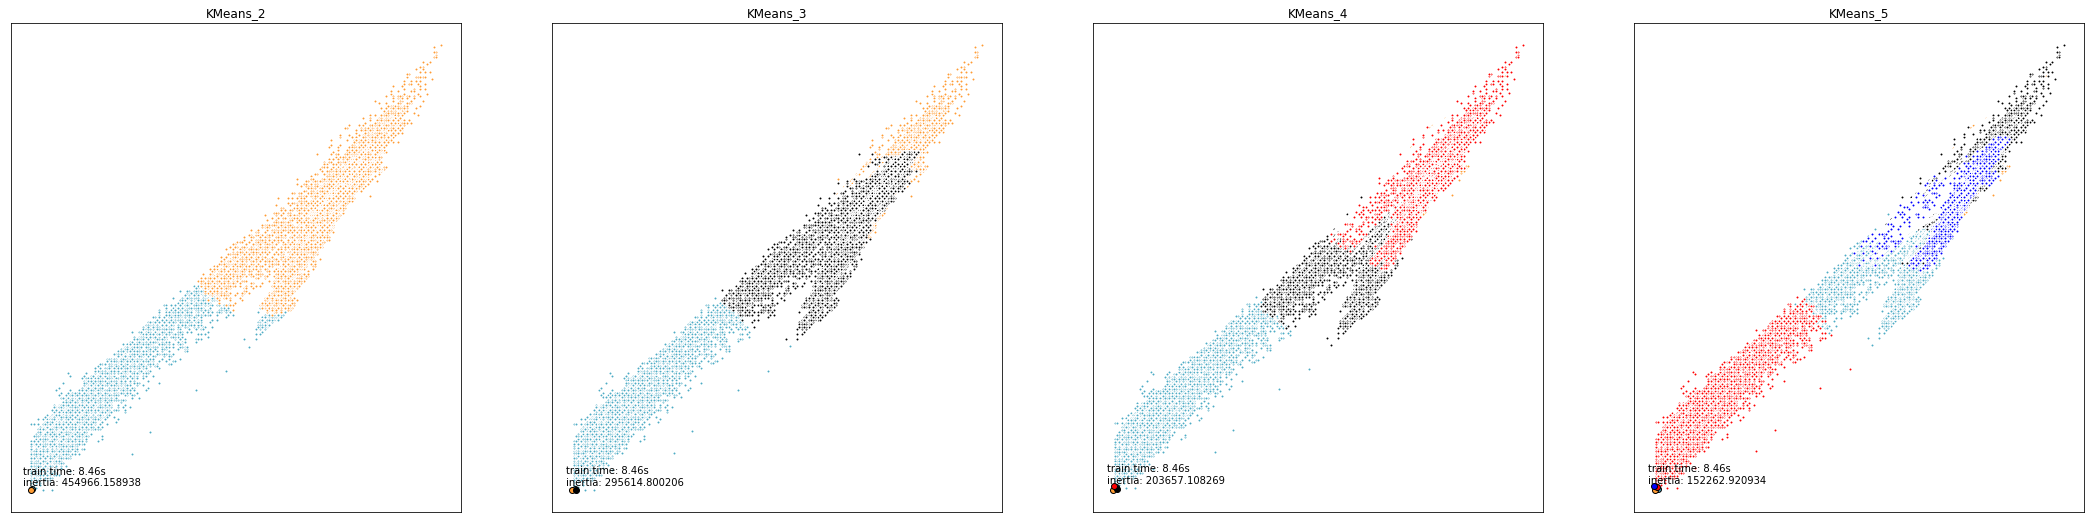

In [11]:
t0 = time.time()
kmeans_2.fit(plane_n)
kmeans_3.fit(plane_n)
kmeans_4.fit(plane_n)
kmeans_5.fit(plane_n)
t_batch = time.time() - t0
fig = plt.figure(figsize=(30, 8))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#000000', '#FF0000', '#0000FF']


k_means_cluster_centers_2 = kmeans_2.cluster_centers_
k_means_cluster_centers_3 = kmeans_3.cluster_centers_
k_means_cluster_centers_4 = kmeans_4.cluster_centers_
k_means_cluster_centers_5 = kmeans_5.cluster_centers_
print(k_means_cluster_centers_2, k_means_cluster_centers_3, k_means_cluster_centers_4, k_means_cluster_centers_5)
k_means_labels_2 = pairwise_distances_argmin(plane_n, k_means_cluster_centers_2)
k_means_labels_3 = pairwise_distances_argmin(plane_n, k_means_cluster_centers_3)
k_means_labels_4 = pairwise_distances_argmin(plane_n, k_means_cluster_centers_4)
k_means_labels_5 = pairwise_distances_argmin(plane_n, k_means_cluster_centers_5)


ax = fig.add_subplot(1, 4, 1)
for k, col in zip(range(2), colors):
    my_members = k_means_labels_2 == k
    cluster_center = k_means_cluster_centers_2[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans_2')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, kmeans_2.inertia_))

ax = fig.add_subplot(1, 4, 2)
for k, col in zip(range(3), colors):
    my_members = k_means_labels_3 == k
    cluster_center = k_means_cluster_centers_3[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans_3')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, kmeans_3.inertia_))

ax = fig.add_subplot(1, 4, 3)
for k, col in zip(range(4), colors):
    my_members = k_means_labels_4 == k
    cluster_center = k_means_cluster_centers_4[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans_4')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, kmeans_4.inertia_))

ax = fig.add_subplot(1, 4, 4)
for k, col in zip(range(5), colors):
    my_members = k_means_labels_5 == k
    cluster_center = k_means_cluster_centers_5[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans_5')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, kmeans_5.inertia_))

[[-0.07221646  0.06409971  0.45953866  0.45321489  0.42842725]
 [ 0.30601602 -0.27162143 -1.94728727 -1.92049042 -1.8154532 ]] [[-0.9133865   0.01606261  0.44701219  0.42505825  0.38181346]
 [ 0.31252126 -0.24953221 -1.99679764 -1.95744777 -1.84443147]
 [ 0.90399976  0.10328599  0.45808907  0.46426813  0.45909947]] [[-0.58219119 -0.9954084   0.38069392  0.34671911  0.31960693]
 [ 0.34023821 -0.22074978 -2.03347606 -1.99132168 -1.88651592]
 [ 1.12699396  0.20614002  0.46213352  0.46823961  0.46156243]
 [-0.77928387  0.90397465  0.47970766  0.47944669  0.44488138]] [[ 0.8533342   0.9349597   0.48459574  0.50592488  0.50308604]
 [ 0.32464371 -0.1925312  -2.06562602 -2.01533044 -1.90760641]
 [-0.95036567  0.8796384   0.47389244  0.46558392  0.42195435]
 [-0.88412771 -0.91561051  0.38657097  0.34855617  0.31318916]
 [ 0.95972135 -0.91288064  0.38976038  0.37213215  0.36808709]]


Text(-3.5, 1.8, 'train time: 7.98s\ninertia: 165236.748301')

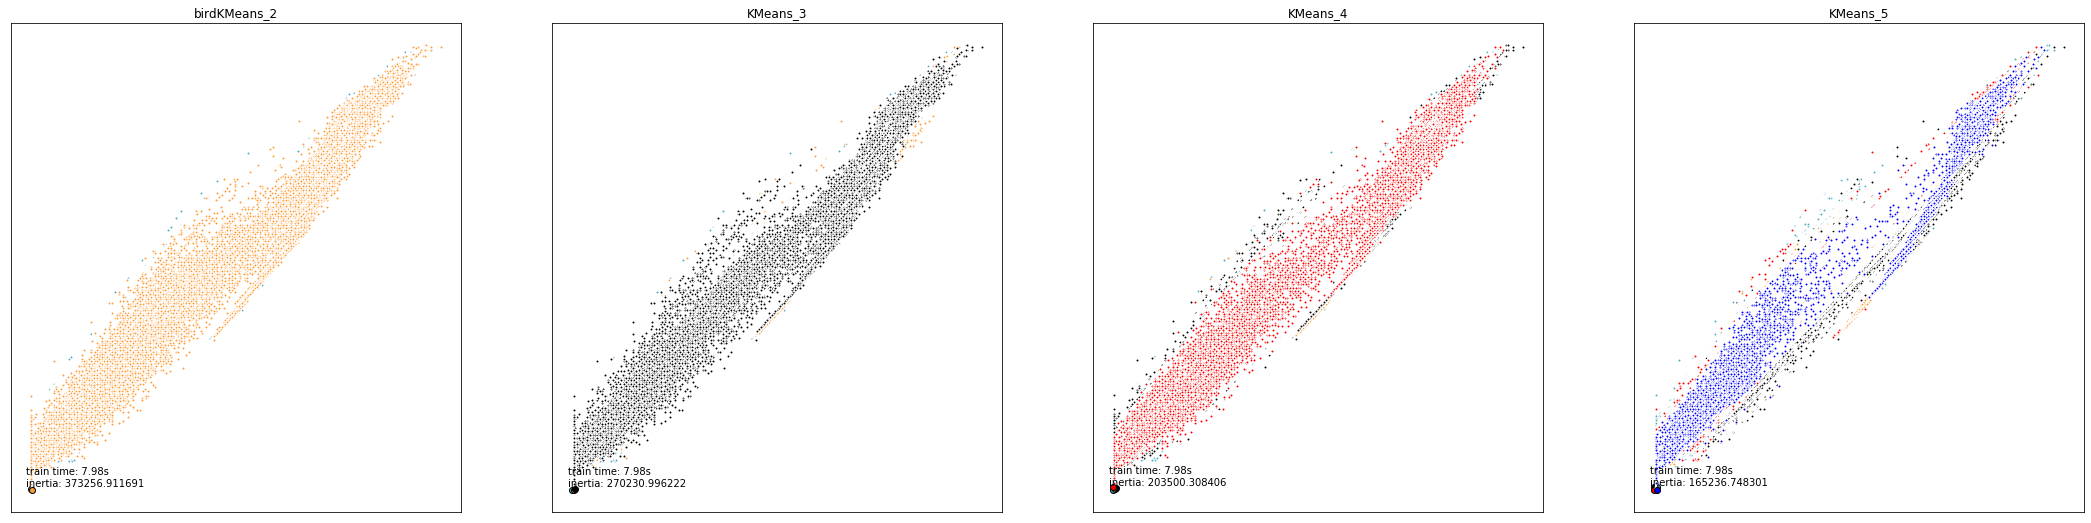

In [100]:
t0 = time.time()
kmeans_2.fit(bird_n)
kmeans_3.fit(bird_n)
kmeans_4.fit(bird_n)
kmeans_5.fit(bird_n)
t_batch = time.time() - t0
fig = plt.figure(figsize=(30, 8))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#000000', '#FF0000', '#0000FF']


birdk_means_cluster_centers_2 = kmeans_2.cluster_centers_
birdk_means_cluster_centers_3 = kmeans_3.cluster_centers_
birdk_means_cluster_centers_4 = kmeans_4.cluster_centers_
birdk_means_cluster_centers_5 = kmeans_5.cluster_centers_
print(birdk_means_cluster_centers_2, birdk_means_cluster_centers_3, birdk_means_cluster_centers_4, birdk_means_cluster_centers_5)
birdk_means_labels_2 = pairwise_distances_argmin(plane_n, k_means_cluster_centers_2)
birdk_means_labels_3 = pairwise_distances_argmin(plane_n, k_means_cluster_centers_3)
birdk_means_labels_4 = pairwise_distances_argmin(plane_n, k_means_cluster_centers_4)
birdk_means_labels_5 = pairwise_distances_argmin(plane_n, k_means_cluster_centers_5)


ax = fig.add_subplot(1, 4, 1)
for k, col in zip(range(2), colors):
    my_members = birdk_means_labels_2 == k
    cluster_center = birdk_means_cluster_centers_2[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('birdKMeans_2')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, kmeans_2.inertia_))

ax = fig.add_subplot(1, 4, 2)
for k, col in zip(range(3), colors):
    my_members = birdk_means_labels_3 == k
    cluster_center = birdk_means_cluster_centers_3[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans_3')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, kmeans_3.inertia_))

ax = fig.add_subplot(1, 4, 3)
for k, col in zip(range(4), colors):
    my_members = birdk_means_labels_4 == k
    cluster_center = birdk_means_cluster_centers_4[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans_4')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, kmeans_4.inertia_))

ax = fig.add_subplot(1, 4, 4)
for k, col in zip(range(5), colors):
    my_members = birdk_means_labels_5 == k
    cluster_center = birdk_means_cluster_centers_5[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans_5')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, kmeans_5.inertia_))

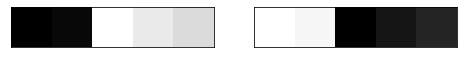

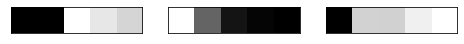

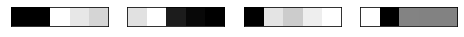

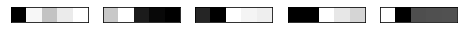

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
centers = kmeans_2.cluster_centers_.reshape(2, 1, 5)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

fig, ax = plt.subplots(1, 3, figsize=(8, 3))
centers = kmeans_3.cluster_centers_.reshape(3, 1, 5)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

fig, ax = plt.subplots(1, 4, figsize=(8, 3))
centers = kmeans_4.cluster_centers_.reshape(4, 1, 5)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    
fig, ax = plt.subplots(1, 5, figsize=(8, 3))
centers = kmeans_5.cluster_centers_.reshape(5, 1, 5)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### The Kmeans conldusion:
we can easily found that 3 clusters gives the most senseble results in both pictures, and if we see the color number as features in a picture, we can also get some interesting results

## The GMM

In [101]:
gmm_2 = GMM(n_components=2, covariance_type='full').fit(plane_n)
gmm_3 = GMM(n_components=3, covariance_type='full').fit(plane_n)
gmm_4 = GMM(n_components=4, covariance_type='full').fit(plane_n)
gmm_5 = GMM(n_components=5, covariance_type='full').fit(plane_n)
birdgmm_2 = GMM(n_components=2, covariance_type='full').fit(bird_n)
birdgmm_3 = GMM(n_components=3, covariance_type='full').fit(bird_n)
birdgmm_4 = GMM(n_components=4, covariance_type='full').fit(bird_n)
birdgmm_5 = GMM(n_components=5, covariance_type='full').fit(bird_n)

In [102]:
features = [2, 3, 4, 5]

In [103]:

def make_ellipses(gmm, ax, ind):
    for n in range(features[ind]):
#         print(n)
        fig = plt.figure(figsize=(20, 5))
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                    180 + angle, color=colors[n])
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

In [104]:
colors = ['navy', 'turquoise', 'darkorange', 'red', 'yellow']

<ipython-input-103-275024cb94a9>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(20, 5))


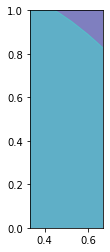

<Figure size 1440x360 with 0 Axes>

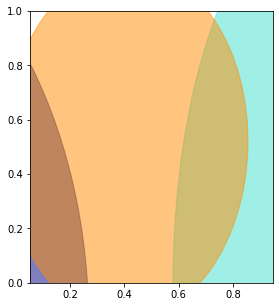

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

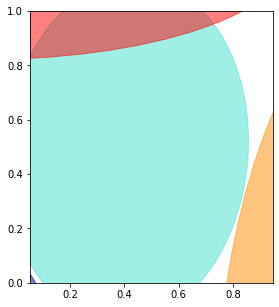

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

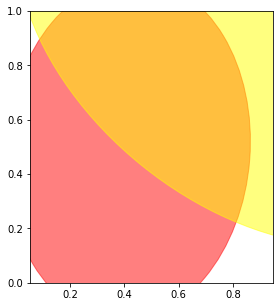

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

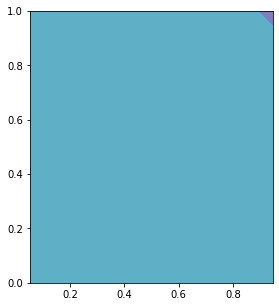

<Figure size 1440x360 with 0 Axes>

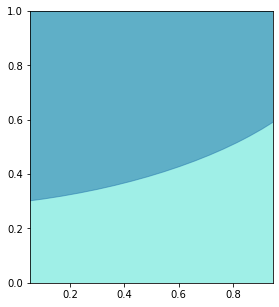

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

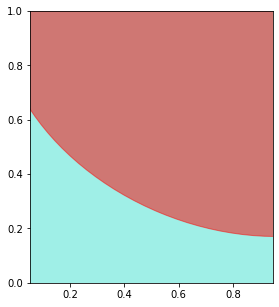

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

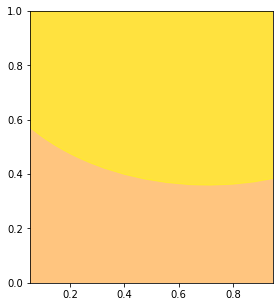

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [105]:
h = plt.subplot(1, 4, 1)
make_ellipses(gmm_2, h, 0)
h = plt.subplot(1, 4, 2)
make_ellipses(gmm_3, h, 1)
h = plt.subplot(1, 4, 3)
make_ellipses(gmm_4, h, 2)
h = plt.subplot(1, 4, 4)
make_ellipses(gmm_5, h, 3)
h = plt.subplot(1, 4, 1)
make_ellipses(birdgmm_2, h, 0)
h = plt.subplot(1, 4, 2)
make_ellipses(birdgmm_3, h, 1)
h = plt.subplot(1, 4, 3)
make_ellipses(birdgmm_4, h, 2)
h = plt.subplot(1, 4, 4)
make_ellipses(birdgmm_5, h, 3)

In [20]:
gmm_2.covariances_

array([[[ 9.85092221e-01,  7.03782805e-02, -1.30477504e-01,
         -2.05199853e-01, -2.31964613e-01],
        [ 7.03782805e-02,  1.03332947e+00,  4.43638784e-04,
         -2.27533728e-02, -3.05455852e-02],
        [-1.30477504e-01,  4.43638784e-04,  1.02523230e-01,
          1.46748214e-01,  1.67826188e-01],
        [-2.05199853e-01, -2.27533728e-02,  1.46748214e-01,
          2.20865598e-01,  2.52446866e-01],
        [-2.31964613e-01, -3.05455852e-02,  1.67826188e-01,
          2.52446866e-01,  2.91270480e-01]],

       [[ 3.09952135e-01, -3.61454108e-01,  5.31147187e-01,
          2.82446100e-01,  1.51126497e-01],
        [-3.61454108e-01,  7.38608644e-01, -8.09346845e-01,
         -4.28228406e-01, -2.22979176e-01],
        [ 5.31147187e-01, -8.09346845e-01,  3.13878020e+00,
          2.51183766e+00,  2.05106496e+00],
        [ 2.82446100e-01, -4.28228406e-01,  2.51183766e+00,
          2.17592453e+00,  1.84635727e+00],
        [ 1.51126497e-01, -2.22979176e-01,  2.05106496e+00,
  

### The GMM conclusion:

we can find that both pictures perform well in the 3 clutsers components section

## The Hiearachical

## Note: in this section, because the full data was too larrge for the embedding function, I use a sample to denote the process

In [89]:
plane_n.shape
sub_sample = plane_n[:20000, :]
birdsub_sample = plane_n[:20000, :]


In [94]:
plane_h = manifold.SpectralEmbedding(n_components=2).fit_transform(sub_sample)
bird_h = manifold.SpectralEmbedding(n_components=2).fit_transform(sub_sample)
print("Done.")

Done.


In [95]:
H_2 = AgglomerativeClustering(linkage='ward', n_clusters=2).fit(plane_h)
H_3 = AgglomerativeClustering(linkage='ward', n_clusters=3).fit(plane_h)
H_4 = AgglomerativeClustering(linkage='ward', n_clusters=4).fit(plane_h)
H_5 = AgglomerativeClustering(linkage='ward', n_clusters=5).fit(plane_h)
b_2 = AgglomerativeClustering(linkage='ward', n_clusters=2).fit(bird_h)
b_3 = AgglomerativeClustering(linkage='ward', n_clusters=3).fit(bird_h)
b_4 = AgglomerativeClustering(linkage='ward', n_clusters=4).fit(bird_h)
b_5 = AgglomerativeClustering(linkage='ward', n_clusters=5).fit(bird_h)

In [75]:
features = [2, 3, 4, 5]

In [76]:
plane_h.shape

(20000, 2)

In [77]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(features[0]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

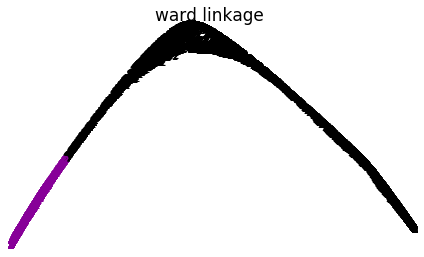

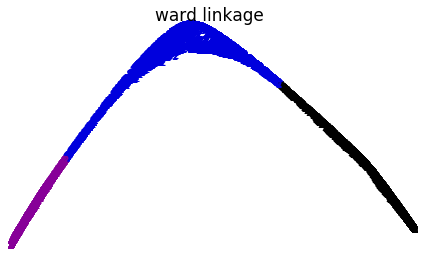

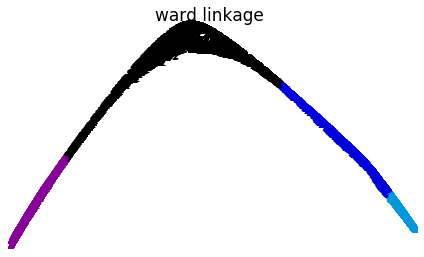

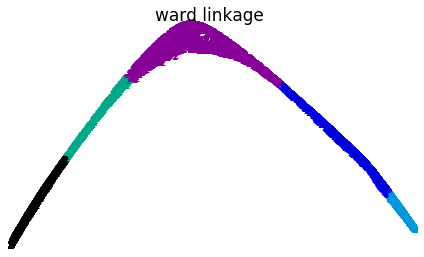

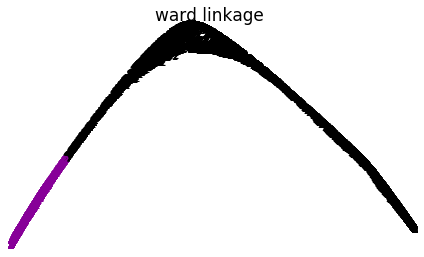

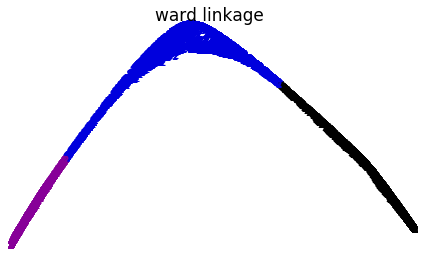

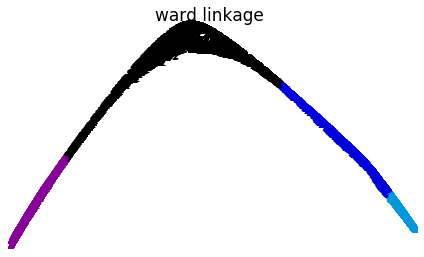

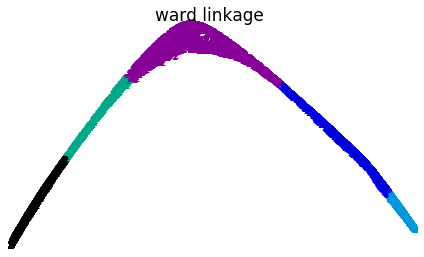

In [96]:
# clustering = AgglomerativeClustering(linkage='ward', n_clusters=10)
# t0 = time()
# print(X_red.shape)
# clustering.fit(X_red)
# print("%s :\t%.2fs" % ('ward', time() - t0))

plot_clustering(plane_h, H_2.labels_, "%s linkage" % 'ward')
plot_clustering(plane_h, H_3.labels_, "%s linkage" % 'ward')
plot_clustering(plane_h, H_4.labels_, "%s linkage" % 'ward')
plot_clustering(plane_h, H_5.labels_, "%s linkage" % 'ward')

plot_clustering(bird_h, H_2.labels_, "%s linkage" % 'ward')
plot_clustering(bird_h, H_3.labels_, "%s linkage" % 'ward')
plot_clustering(bird_h, H_4.labels_, "%s linkage" % 'ward')
plot_clustering(bird_h, H_5.labels_, "%s linkage" % 'ward')



plt.show()

### The Hiararchical conclusion:

we can find that in similiar normalized dataset that the clustering results are also similiar.